          PC1       PC2
0    0.002733  0.129016
1   -0.058746  0.012368
2   -0.059996 -0.001635
3   -0.122002 -0.011378
4    0.003959  0.028298
..        ...       ...
147 -0.138944 -0.558095
148 -0.029921 -0.316254
149  0.009146 -0.145003
150  0.020766 -0.049907
151  0.135239 -0.044086

[152 rows x 2 columns]


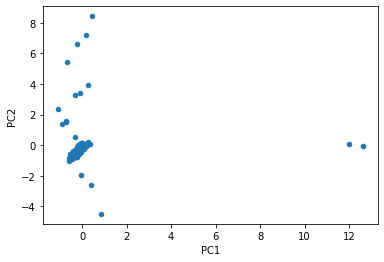

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('6. Dataset PCA/MeterC_pca.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


,PC1,PC2,Cluster
0,0.002733,0.129016,1
1,-0.058746,0.012368,1
2,-0.059996,-0.001635,1
3,-0.122002,-0.011378,1
4,0.003959,0.028298,1
...,...,...,...
147,-0.138944,-0.558095,1
148,-0.029921,-0.316254,1
149,0.009146,-0.145003,1
150,0.020766,-0.049907,1


In [5]:
km.cluster_centers_

array([[-0.14896323, -0.32505202],
       [-0.07698146,  6.92161119],
       [12.29291545,  0.02960337],
       [-0.51028806,  2.49093993]])

No handles with labels found to put in legend.


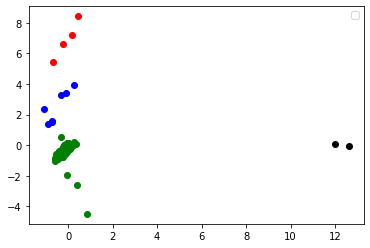

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
df3 = dataA_feature[dataA_feature.Cluster==3]
df4 = dataA_feature[dataA_feature.Cluster==4]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.scatter(df3['PC1'],df3['PC2'],color='black')
plt.scatter(df4['PC1'],df4['PC2'],color='blue')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[611.8689811414525,
 305.60591058104217,
 85.47601761487759,
 54.94995635877025,
 31.978113156326117,
 22.09537939029617,
 14.507314682668921,
 10.94059705994252,
 7.748430807420871]

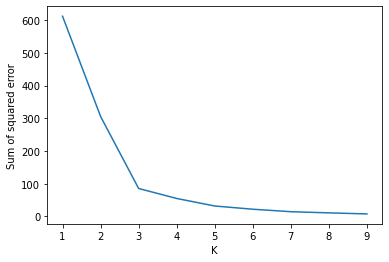

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)